In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [4]:
main_dataset = pd.read_csv('dataset.csv')
main_dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
main_dataset["symptoms"] = 0
for j in range(main_dataset.shape[0]):
    values = main_dataset.iloc[j].values
    values = values.tolist()
    if 0 in values:
        main_dataset["symptoms"][j] = values[1:values.index(0)]
    else:
        main_dataset["symptoms"][j] = values[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
objects = (main_dataset.dtypes == 'object')
columns = list(objects[objects].index)
print(columns)
column_values = main_dataset[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
print(column_values)
symptoms=pd.unique(column_values.tolist())

['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'symptoms']
['itching' ' skin_rash' ' nodal_skin_eruptions' ... nan nan nan]


In [7]:
df = pd.DataFrame(columns = symptoms,index = main_dataset.index)
df['symptoms']=main_dataset['symptoms']

for i in df:
    df[i] = main_dataset.apply(lambda x:1 if i in x.symptoms else 0, axis=1)

In [8]:
df.head()
df['Disease']=main_dataset['Disease']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [9]:
new_data=df.drop("symptoms",axis=1)

In [10]:
X = df.drop('Disease',axis=1)
y = df['Disease']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [12]:
clf = DecisionTreeClassifier(random_state = 0)

In [13]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(random_state=0)

In [14]:
clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array(['Heart attack', 'hepatitis A', 'Tuberculosis', ..., 'Migraine',
       'Varicose veins', '(vertigo) Paroymsal  Positional Vertigo'],
      dtype=object)

[Text(0.9710144927536232, 0.9916666666666667, 'X[110] <= 0.5\ngini = 0.976\nsamples = 3444\nvalue = [88, 89, 82, 86, 87, 84, 81, 79, 87, 85, 78, 93\n87, 80, 80, 89, 78, 84, 71, 89, 88, 79, 83, 85\n86, 99, 87, 81, 84, 89, 78, 83, 79, 82, 86, 89\n83, 78, 84, 82, 82]'),
 Text(0.9565217391304348, 0.975, 'X[66] <= 0.5\ngini = 0.975\nsamples = 3345\nvalue = [88, 89, 82, 86, 87, 84, 81, 79, 87, 85, 78, 93\n87, 80, 80, 89, 78, 84, 71, 89, 88, 79, 83, 85\n86, 0, 87, 81, 84, 89, 78, 83, 79, 82, 86, 89\n83, 78, 84, 82, 82]'),
 Text(0.9420289855072463, 0.9583333333333334, 'X[71] <= 0.5\ngini = 0.974\nsamples = 3252\nvalue = [88, 89, 82, 86, 87, 84, 81, 79, 87, 85, 78, 0\n87, 80, 80, 89, 78, 84, 71, 89, 88, 79, 83, 85\n86, 0, 87, 81, 84, 89, 78, 83, 79, 82, 86, 89\n83, 78, 84, 82, 82]'),
 Text(0.927536231884058, 0.9416666666666667, 'X[105] <= 0.5\ngini = 0.974\nsamples = 3163\nvalue = [88, 89, 82, 86, 87, 84, 81, 79, 87, 85, 78, 0\n87, 80, 80, 89, 78, 84, 71, 0, 88, 79, 83, 85\n86, 0, 87, 81, 84, 8

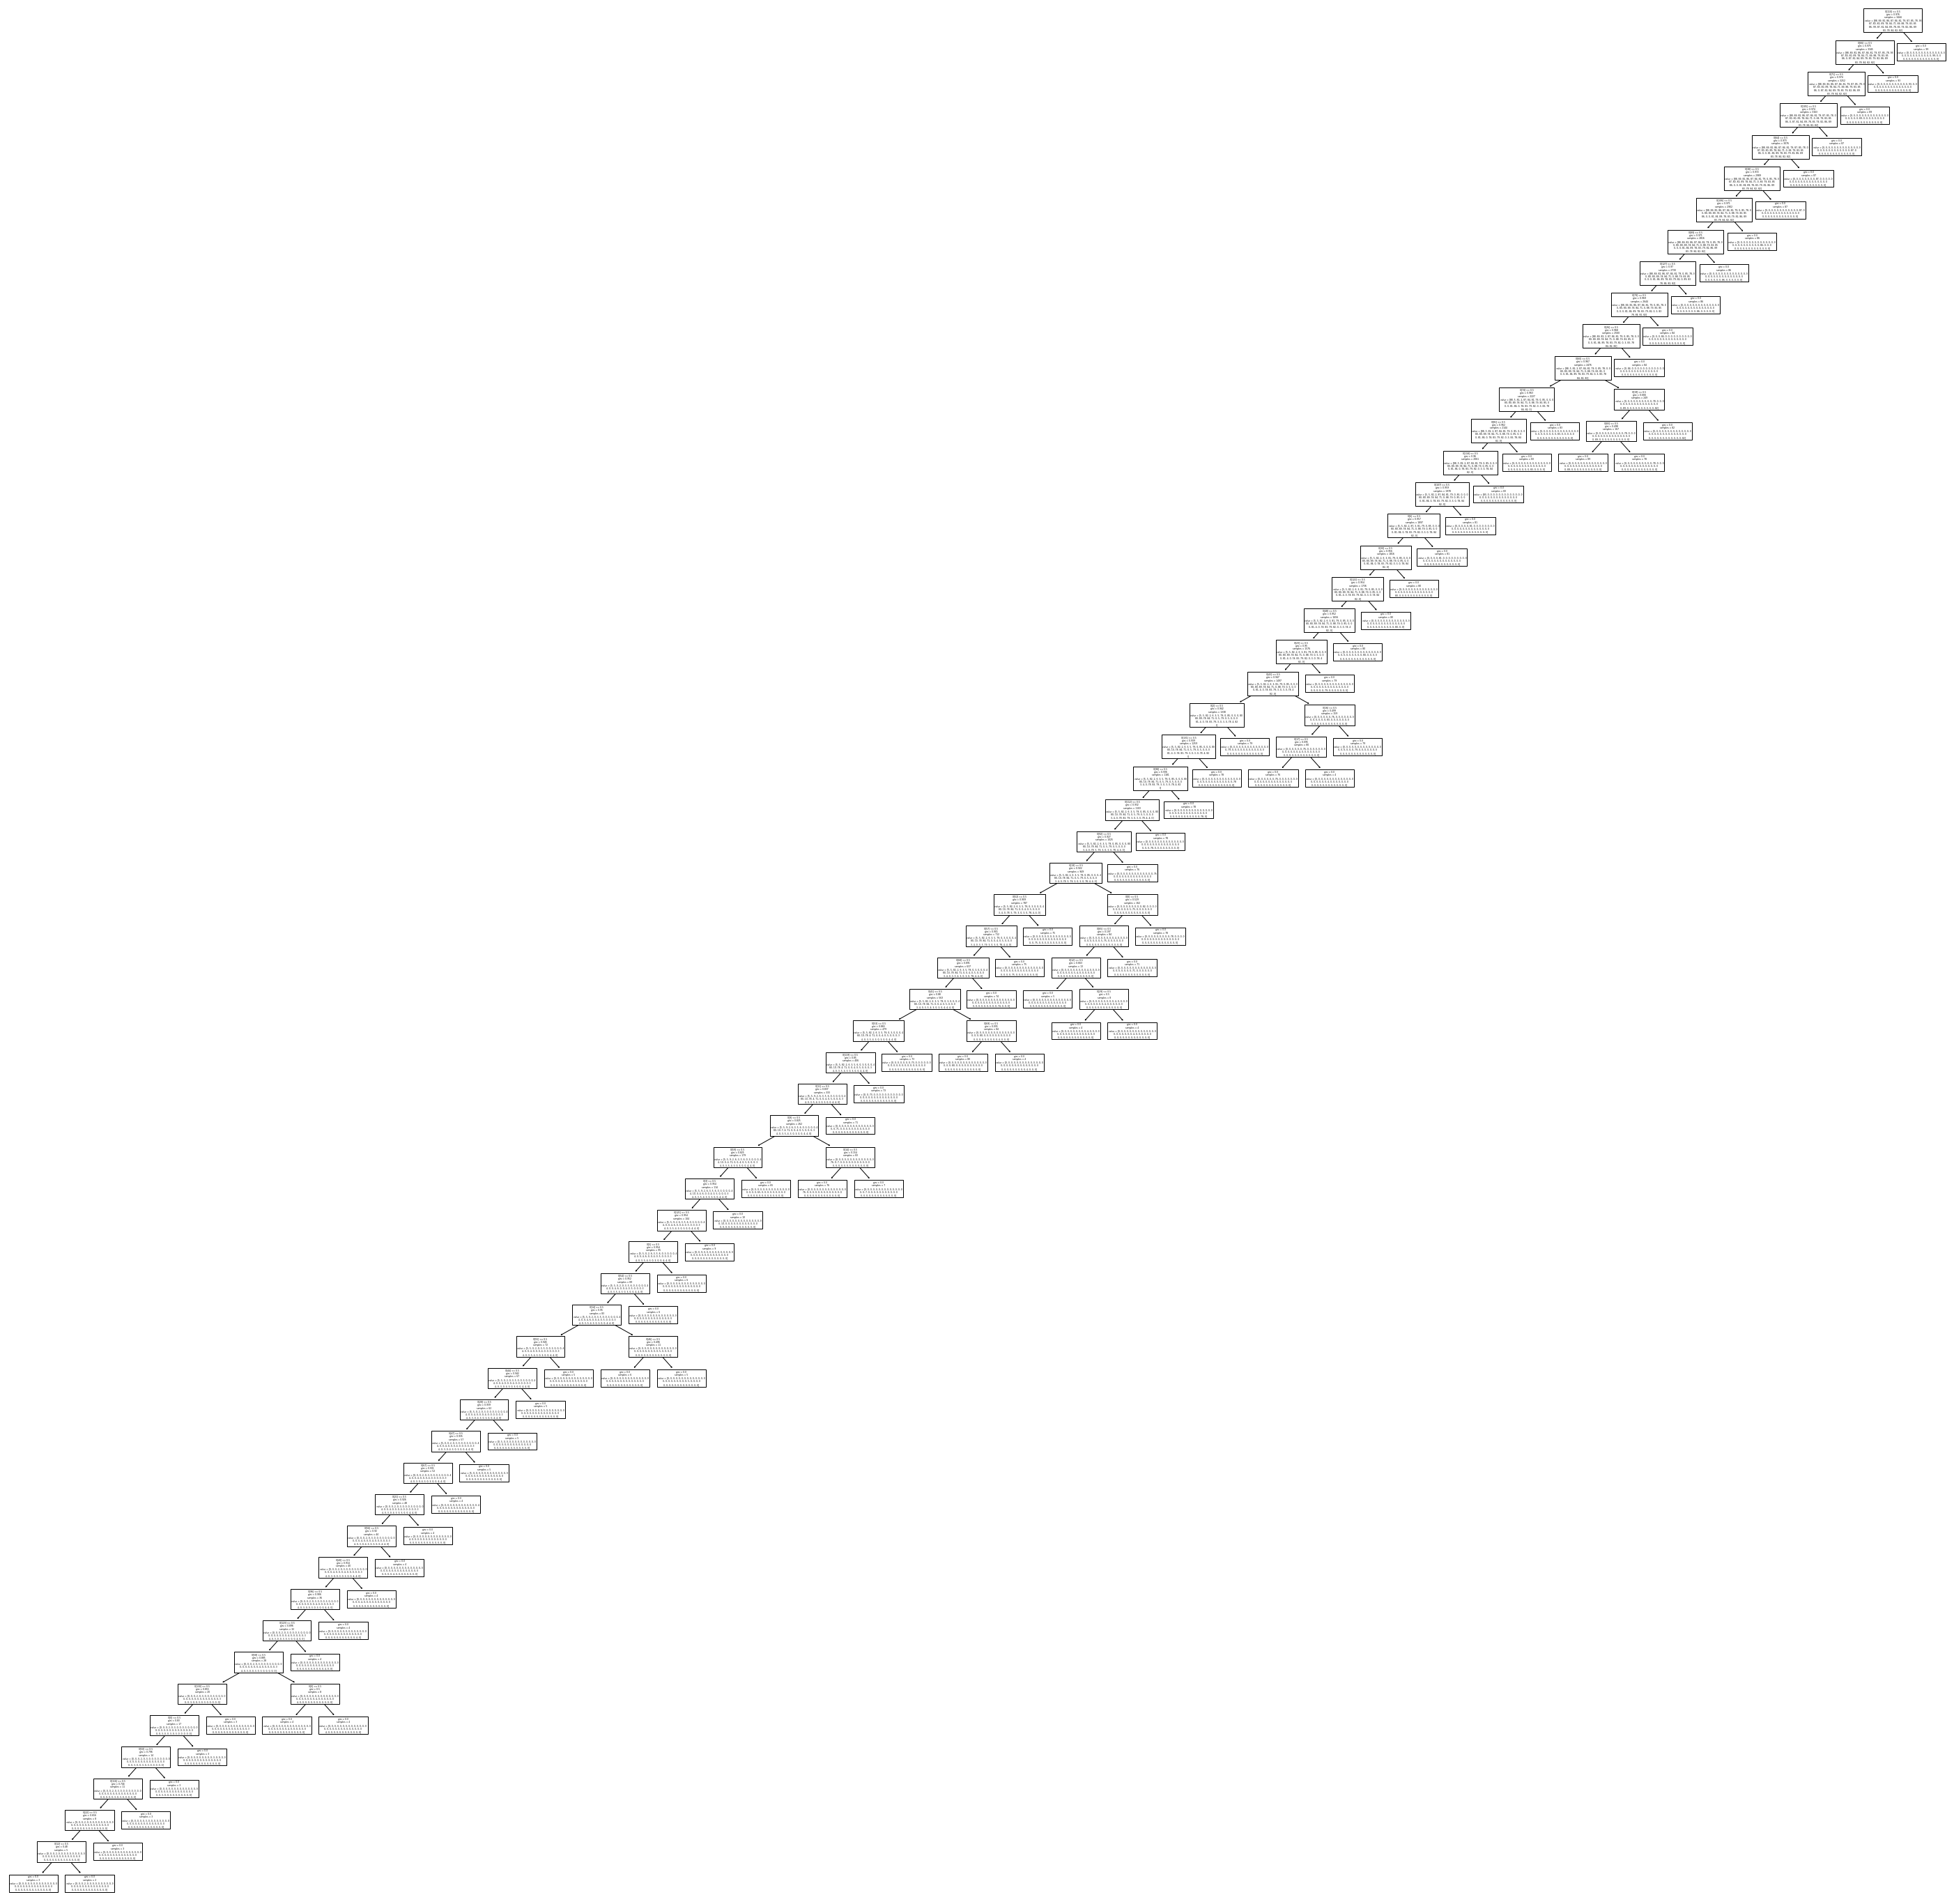

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plot_tree(clf)

In [16]:
import pickle
pickle.dump(clf,open('disease_prediction.pkl','wb'))